# how does the number of sightings of Phylloscopus collybita vary per month and country?

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import seaborn as sb

In [ ]:
df=pd.read_csv('<PATH>/0035785-251025141854904.csv',
               sep='\t',
               skiprows=1,
               names=['species','specieskey','year','month','countrycode','occurences'])

In [3]:
spe_name='Phylloscopus collybita'
df_spe=df[df['species']==spe_name]

In [4]:
piv=df_spe.pivot_table(
    index='month',
    columns='countrycode',
    values='occurences',
    aggfunc='sum',
    fill_value=0
)

In [9]:
print(piv)

countrycode     DE     FR
month                    
1              353   2942
2              324   3139
3            10601   9408
4            24478  12355
5            24620  10911
6            15135   7748
7            10491   5983
8             8212   6588
9            10452   7107
10            8235   9141
11            1040   3601
12             562   3431


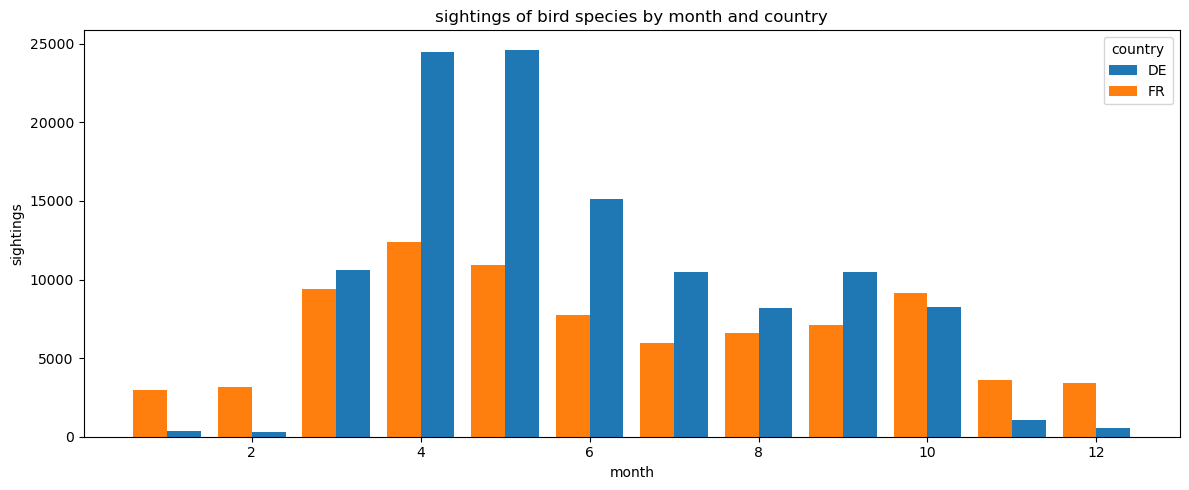

In [6]:
pivot_reset=piv.reset_index().melt(id_vars='month',var_name='country',value_name='occurences')
mpl.figure(figsize=(12,5))
for country in piv.columns:
    mpl.bar(piv.index+(0.2 if country==piv.columns[0] else -0.2),
            piv[country],width=0.4,label=country)
mpl.xlabel('month')
mpl.ylabel('sightings')
mpl.title('sightings of bird species by month and country')
mpl.legend(title='country')
mpl.tight_layout()